### GWAS结果可视化

In [ ]:
library(CMplot)

# 设定阈值线
x <- 1/126890
df <- read.table('RRDW_GWAS_result.txt',header = T)

# 关联性状
pho <- 'R-RDW'

gwas <- df[,c(1,2,3,5)]
#gwas <- df[,c(2,1,3,12)]
#gwas <- df[,c(1:4)]

names(gwas) <- c('taxa','chr','pos',pho)

CMplot(gwas,plot.type = "m",threshold = x,threshold.col=c('grey','black'),
       threshold.lty = c(1,2),threshold.lwd = c(1,1), amplify = T,
       signal.cex = c(1,1), signal.pch = c(20,20),signal.col = c("red","orange"))

CMplot(gwas,plot.type="q",conf.int.col=NULL,box=TRUE,file="jpg",dpi=300,
       file.output=TRUE,verbose=TRUE,threshold = 0.05,amplify = F)

### 单倍型

In [1]:
library(ggplot2)
library(ggpubr)
library(agricolae) 
library(ggthemes)
library(dplyr)
library(tidyr)
library(patchwork)


载入程辑包：'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
z = 'Germination Rate'
data <- read.table('./LOC_Os01g07530_fin_new_hap.txt',sep='\t',header = T,row.names = 1)
data <- data[,(ncol(data)-3):ncol(data)]
head(data)

,Hap_com,Hap,X21y,Sub
,<chr>,<chr>,<dbl>,<chr>
CX206,CCTGATCGAATTGGGACCG,Hap1,85.33,XI
CX2,CCTGATCGAATTGGGACCG,Hap1,92.67,XI
IRIS_313-11738,CCTGATCGAATTGGGACCG,Hap1,90.67,XI
IRIS_313-11806,CCTGATCGAATTGGGACCG,Hap1,81.33,XI
CX313,CCTGATCGAATTGGGACCG,Hap1,90.67,XI
IRIS_313-11751,CCTGATCGAATTGGGACCG,Hap1,97.33,XI


In [5]:
# 删除NA所在行
data <- data[complete.cases(data), ]

# 删除单倍型较少的行
unique_counts <- table(data$Hap)
data <- data[!(data$Hap %in% names(unique_counts)[unique_counts < 10]), ]

# 进行方差分析
names(data) <- c('HAP_com','Hap','Phe','Sub')
data$Sub[data$Sub == "GJ"] <- "Japonica"
data$Sub[data$Sub == "XI"] <- "Indica"
# data$Hap[data$Hap == "Hap8"] <- "Hap6"
h = max(data$Phe)*1.1
aov_result <- aov(Phe~Hap, data)
summary(aov_result)
TukeyHSD(aov_result)

# 多重比较
re = LSD.test(aov_result,'Hap',alpha = 0.05)
re1 = re$groups
re1

length(unique(rownames(re1)))

             Df Sum Sq Mean Sq F value   Pr(>F)    
Hap           4  28033    7008   9.741 2.18e-07 ***
Residuals   279 200735     719                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Phe ~ Hap, data = data)

$Hap
                 diff        lwr       upr     p adj
Hap2-Hap1 -29.6159331 -43.425519 -15.80635 0.0000001
Hap3-Hap1  -5.2006226 -18.685495   8.28425 0.8273128
Hap4-Hap1   7.6211552  -9.767833  25.01014 0.7494515
Hap5-Hap1  -0.7788448 -18.167833  16.61014 0.9999482
Hap3-Hap2  24.4153105   6.802795  42.02783 0.0016170
Hap4-Hap2  37.2370882  16.482913  57.99126 0.0000142
Hap5-Hap2  28.8370882   8.082913  49.59126 0.0015643
Hap4-Hap3  12.8217778  -7.717768  33.36132 0.4269999
Hap5-Hap3   4.4217778 -16.117768  24.96132 0.9763366
Hap5-Hap4  -8.4000000 -31.689656  14.88966 0.8595755


,Phe,groups
,<dbl>,<chr>
Hap4,90.76650,a
Hap1,83.14534,a
Hap5,82.36650,a
Hap3,77.94472,a
Hap2,53.52941,b


[1] 5

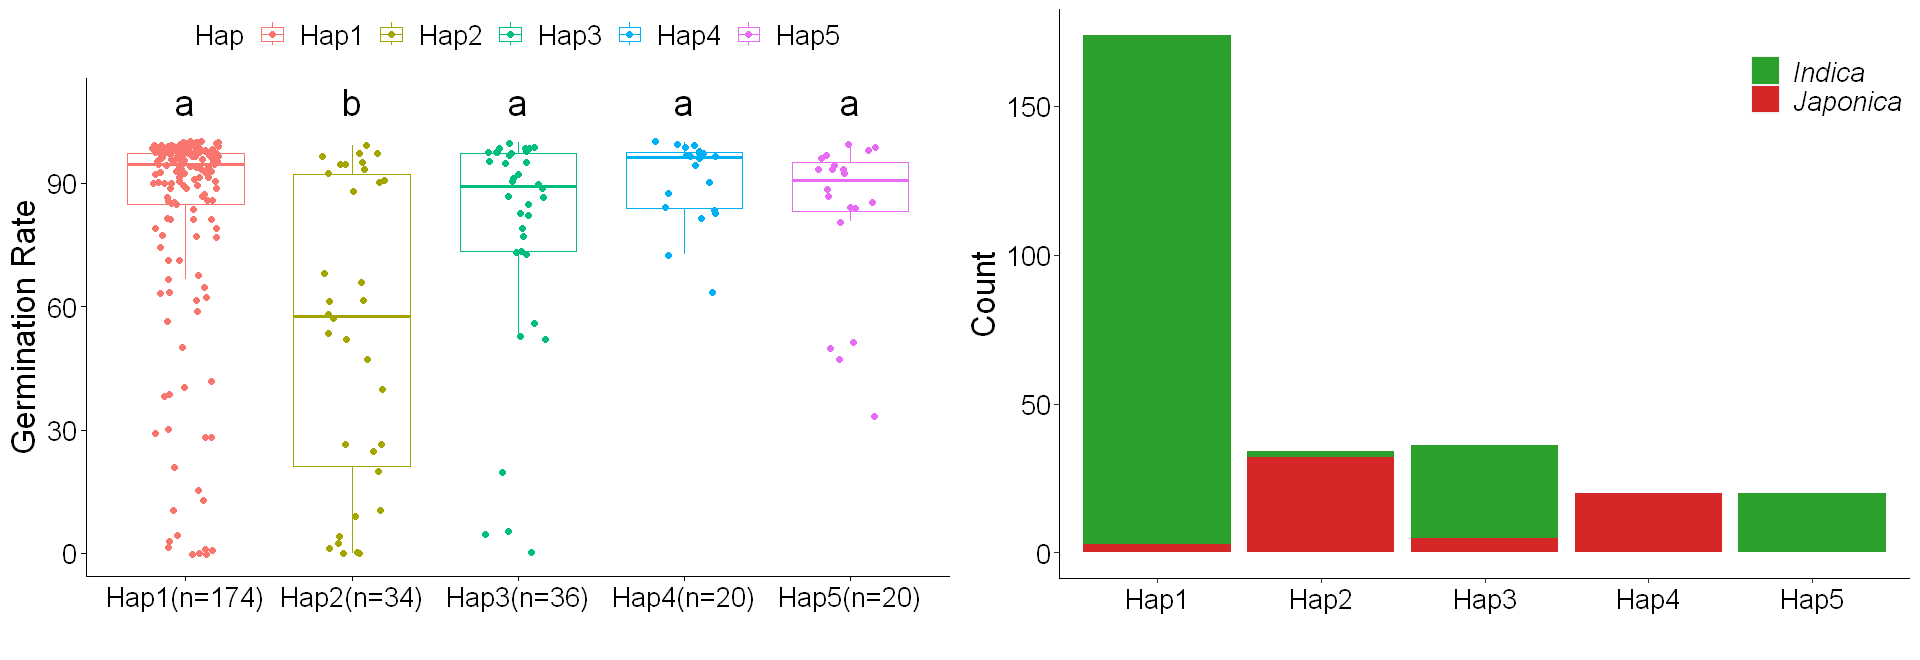

In [14]:
# 绘图(箱线图)
hap1 = re1['Hap1','groups']
hap2 = re1['Hap2','groups']
hap3 = re1['Hap3','groups']
hap4 = re1['Hap4','groups']
hap5 = re1['Hap5','groups']

data$Hap <- factor(data$Hap, levels = c("Hap1", "Hap2", "Hap3", "Hap4", "Hap5"))

p1 <- ggboxplot(data, x = "Hap", y = "Phe", color = "Hap", add = "jitter") +
  scale_x_discrete(labels = c("Hap1" = paste0("Hap1(n=", nrow(data[data$Hap == "Hap1",]), ")"),
                              "Hap2" = paste0("Hap2(n=", nrow(data[data$Hap == "Hap2",]), ")"),
                              "Hap3" = paste0("Hap3(n=", nrow(data[data$Hap == "Hap3",]), ")"),
                              "Hap4" = paste0("Hap4(n=", nrow(data[data$Hap == "Hap4",]), ")"),
                              "Hap5" = paste0("Hap5(n=", nrow(data[data$Hap == "Hap5",]), ")"))) +
  annotate("text",label=hap1,x=1,y=h,size=8)+
  annotate("text",label=hap2,x=2,y=h,size=8)+
  annotate("text",label=hap3,x=3,y=h,size=8)+
  annotate("text",label=hap4,x=4,y=h,size=8)+
  annotate("text",label=hap5,x=5,y=h,size=8)+
  labs(x = "", y = z) +
  theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 20),
        legend.text = element_text(size = 16),
        legend.title = element_text(size = 16))


# 绘图堆积图
p2 <- ggplot(data, aes(x = Hap, fill = Sub)) +
  geom_bar() +
  scale_fill_manual(values = c("Indica" = "#2ca02c", "Japonica" = "#d62728")) +
  theme(panel.grid = element_blank(),
        panel.background = element_rect(fill = "white"),
        axis.line = element_line(),
        axis.text = element_text(size = 16,color = 'black'),
        axis.title = element_text(size = 20),
        legend.position = c(0.9,0.9),
        legend.text = element_text(size = 16,face = "italic"),
        legend.title = element_text(size = 16))+
  labs(x = "", y = "Count",fill="")

combined_plots <- p1 + p2
# pdf(paste(gene,'gr','pdf',sep = '.'),width = 16,height = 5.5)
# dev.off()
options(repr.plot.width=16, repr.plot.height=5.5)
ggarrange(p1,p2,ncol = 2,nrow = 1)

### 树形图

In [2]:
library("ggplot2")
library("ggtree")
library("colorspace")
treFile="input.tre"           
groupFile="group.txt"           

Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

ggtree v3.2.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

1. Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96
2. Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution. 2018, 35(12):3041-3043. doi:10.1093/molbev/msy194
3. Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628




载入程辑包：'ggtree'


The following object is masked from 'package:tidyr':

    expand


The following object is m

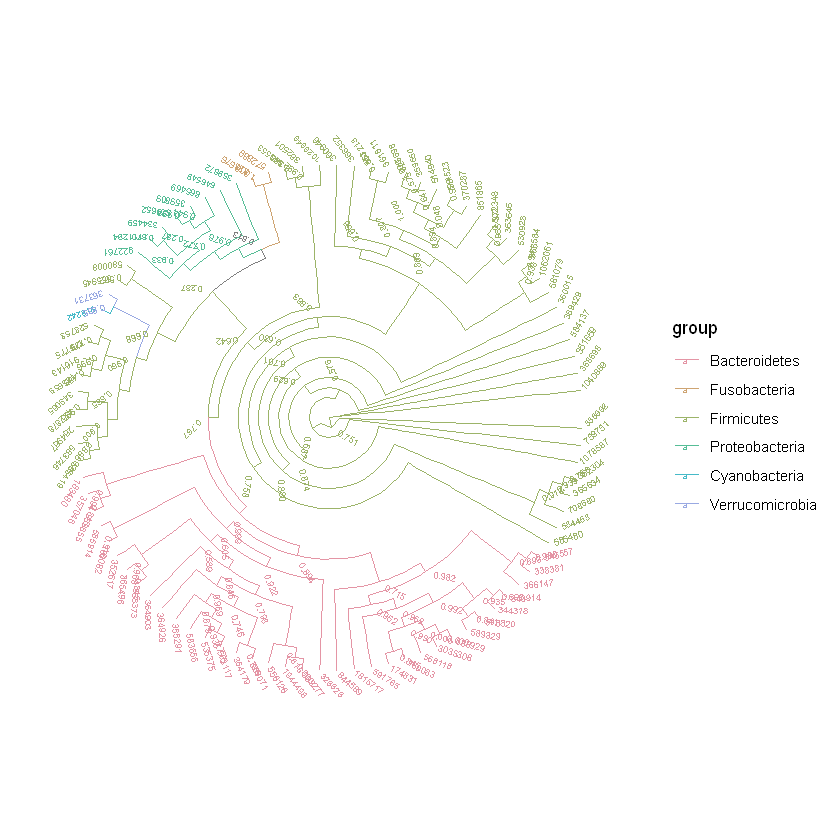

In [3]:
cls=list()
rt=read.table(groupFile,sep="\t",header=T)
for(i in 1:nrow(rt)){
	otu=as.character(rt[i,1])
	phylum=as.character(rt[i,2])
	cls[[phylum]]=c(cls[[phylum]], otu)
}
phylumNames=names(cls)
phylumNum=length(phylumNames)

#读取进化树文件，和属性文件合并
tree=read.tree(treFile)
tree=groupOTU(tree, cls)

#绘制
ggtree(tree, 
       layout="circular", 
       ladderize = F, 
       branch.length="none", 
       aes(color=group)) + 
       scale_color_manual(values=c(rainbow_hcl(phylumNum+1)),breaks=phylumNames, labels=phylumNames ) + 
       theme(legend.position="right") + 
       geom_text(aes(label=paste("                ",label,sep=""), 
       angle=angle+45), 
       size=2)